# Multi class Amazon product reviews classification using BERT

In [27]:
# Import necessary library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from mlxtend.plotting import plot_confusion_matrix

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive/multi_class_text_classification 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
'Copy of delete now.ipynb'
 deep_learning_multi_class_text_classification.ipynb
'delete now.ipynb'
 machine_learning_multi_class_text_classification.ipynb
 text_cls
 Transformer_multi_class_text_classification.ipynb


In [3]:
!pip install simpletransformers

In [5]:
# Read data
df = pd.read_csv('/content/gdrive/MyDrive/multi_class_text_classification/text_cls/train_40k.csv')[['Text','Cat1']]
df.head()

,Text,Cat1
0,The description and photo on this product need...,grocery gourmet food
1,This was a great book!!!! It is well thought t...,toys games
2,"I am a first year teacher, teaching 5th grade....",toys games
3,I got the book at my bookfair at school lookin...,toys games
4,Hi! I'm Martine Redman and I created this puzz...,toys games


In [6]:
df.shape

(40000, 2)

In [7]:
# Drop duplicates
df.drop_duplicates(inplace=True)
df.shape

(39512, 2)

In [8]:
df['Cat1'].value_counts()

toys games              10246
health personal care     9524
beauty                   5722
baby products            5602
pet supplies             4820
grocery gourmet food     3598
Name: Cat1, dtype: int64

In [9]:
# Balance all classes
df = df.groupby('Cat1').sample(n=3598)
df

,Text,Cat1
13775,I purchased 2 of these within weeks of each ot...,baby products
33029,I was very exited when ordered this set. I got...,baby products
38075,I bought two of these swings. One for my home ...,baby products
6313,I love this high chair. The best feature is th...,baby products
11156,I bought this same mattress pad in 2005 and su...,baby products
...,...,...
36602,These jacks are durable and the box and bag ar...,toys games
10222,We got this for our kids last year(twins 3 and...,toys games
8369,"The idea was great, but the reclaining bed and...",toys games
416,This game is a perfact game to show how well y...,toys games


In [12]:
df['Cat1'].unique()

array(['baby products', 'beauty', 'grocery gourmet food',
       'health personal care', 'pet supplies', 'toys games'], dtype=object)

In [13]:
# Train test split of data
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Cat1'], test_size = 0.2)
df_test = pd.concat([X_test,y_test],axis=1)

In [15]:
# Create dataframe required for model
df_train = pd.concat([X_train,y_train],axis=1)
df_test = pd.concat([X_test,y_test],axis=1)

## Model training

In [17]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs

In [18]:
model_args = ClassificationArgs()
model_args.num_train_epochs = 15
model_args.train_batch_size = 32
model_args.overwrite_output_dir =True
model_args.learning_rate = 1e-5
model_args.use_early_stopping = True
model_args.early_stopping_delta = 0.01
model_args.early_stopping_metric = "mcc"
model_args.early_stopping_metric_minimize = False
model_args.early_stopping_patience = 5
model_args.evaluate_during_training = True
model_args.evaluate_during_training_steps = 1000
model_args.evaluate_during_training_verbose = True
model_args.labels_list = ['baby products', 'beauty', 'grocery gourmet food', 'health personal care', 'pet supplies', 'toys games']

In [19]:
model = ClassificationModel("bert", "bert-base-cased",num_labels = 6,args=model_args)

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

In [20]:
model.train_model(df_train,eval_df= df_test, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:449: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/17270 [00:00<?, ?it/s]

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/540 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1029: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/4318 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/4318 [00:00<?, ?it/s]

  0%|          | 0/4318 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/4318 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/4318 [00:00<?, ?it/s]

  0%|          | 0/4318 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/4318 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/4318 [00:00<?, ?it/s]

  0%|          | 0/4318 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/4318 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/4318 [00:00<?, ?it/s]

  0%|          | 0/4318 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/4318 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/4318 [00:00<?, ?it/s]

  0%|          | 0/4318 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/4318 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/4318 [00:00<?, ?it/s]

  0%|          | 0/4318 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/4318 [00:00<?, ?it/s]

(7000,
 {'acc': [0.8228346456692913,
   0.8448355720240852,
   0.8517832329782307,
   0.8575729504400186,
   0.8619731357109773,
   0.8601204261232052,
   0.8626679018063919,
   0.8615099583140343,
   0.8594256600277906,
   0.8622047244094488,
   0.8615099583140343,
   0.8619731357109773,
   0.8652153774895786,
   0.8605836035201482,
   0.8619731357109773,
   0.8601204261232052,
   0.8608151922186197,
   0.8605836035201482,
   0.8626679018063919],
  'eval_loss': [0.5200951377205827,
   0.4650335586560821,
   0.4487353712906716,
   0.44002308818615143,
   0.45890402235694366,
   0.46675921490036504,
   0.5089785726650411,
   0.5723161193783637,
   0.5646568563764621,
   0.6267864885108321,
   0.6697330512479379,
   0.6981853776902426,
   0.749572787404651,
   0.7675006532714448,
   0.7941334746831907,
   0.8348567721123497,
   0.8312976587680169,
   0.8619965960191891,
   0.869993306010373],
  'global_step': [540,
   1000,
   1080,
   1620,
   2000,
   2160,
   2700,
   3000,
   3240,
 

## Model evaluation

In [21]:
# Model evaluation
result, model_outputs, wrong_predictions = model.eval_model(df_test, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1029: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/4318 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/540 [00:00<?, ?it/s]

In [22]:
result

{'acc': 0.8626679018063919,
 'eval_loss': 0.869993306010373,
 'mcc': 0.8352557396964412}

## Prediction

In [23]:
# Prediction on test data
y_pred, model_ouputs = model.predict(list(df_test['Text']))

  0%|          | 0/4318 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

## Plot classification report and confusion matrix

In [24]:
print(classification_report(df_test['Cat1'], y_pred))

                      precision    recall  f1-score   support

       baby products       0.85      0.88      0.86       758
              beauty       0.84      0.85      0.84       666
grocery gourmet food       0.90      0.92      0.91       730
health personal care       0.78      0.72      0.75       702
        pet supplies       0.92      0.91      0.91       759
          toys games       0.88      0.89      0.88       703

            accuracy                           0.86      4318
           macro avg       0.86      0.86      0.86      4318
        weighted avg       0.86      0.86      0.86      4318



In [29]:
# Confusion matrix on test data
confusion_mat = confusion_matrix(df_test['Cat1'], y_pred)
confusion_mat

array([[664,  12,   7,  18,  14,  43],
       [ 12, 568,   7,  57,  12,  10],
       [  6,  10, 674,  32,   3,   5],
       [ 42,  76,  49, 503,  19,  13],
       [ 18,   7,   7,  20, 689,  18],
       [ 37,   6,   9,  13,  11, 627]])

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f830a194bd0>)

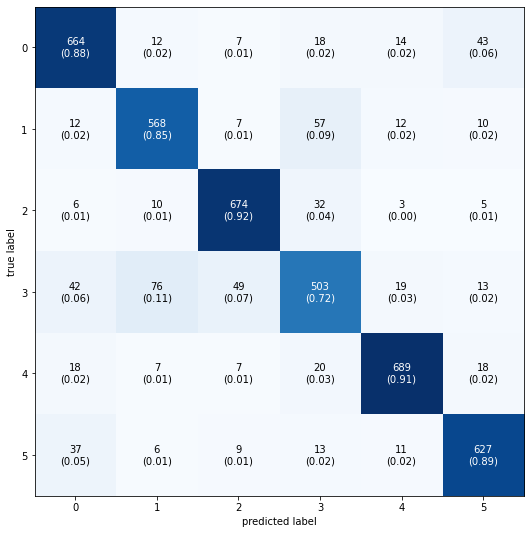

In [30]:
# Confusion matrix plot
plot_confusion_matrix(confusion_mat,figsize=(9,9), show_normed=True)